<a href="https://colab.research.google.com/github/Archana-coder344/Nutrient-deficiency-detection-using-CNN/blob/main/Nutrient_deficient_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import zipfile
import os
import shutil
from sklearn.model_selection import train_test_split

uploaded = files.upload()  # Upload your zip file

# Step 2: Extract the zip
for filename in uploaded.keys():
    print('Uploaded file:', filename)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/banana_dataset')

Saving Nutrient Deficient RAW Images of Banana Leaves.zip to Nutrient Deficient RAW Images of Banana Leaves (1).zip
Uploaded file: Nutrient Deficient RAW Images of Banana Leaves (1).zip


In [ ]:
!ls /content/banana_dataset

 __MACOSX  'Nutrient Deficient RAW Images of Banana Leaves'


In [ ]:
base_dir = '/content/banana_dataset_split'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
classes = ['healthy', 'boron', 'calcium', 'iron', 'magnesium', 'manganese', 'potassium', 'sulphur', 'zinc']


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Correct dataset path based on your folder name
dataset_path = "/content/banana_dataset/Nutrient Deficient RAW Images of Banana Leaves"

# Where to create new split folders
base_dir = "/content/banana_split"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List class folders
classes = os.listdir(dataset_path)
print("Classes found:", classes)

# Split each class 80% train / 20% test
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, cls, img))
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, cls, img))

print("\n✨ Splitting completed successfully!")
print("Training folder:", train_dir)
print("Testing folder:", test_dir)

Classes found: ['potassium.zip', 'iron.zip', 'magnesium.zip', 'magnesium', 'potassium', 'manganese', 'boron.zip', '.DS_Store', 'zinc', 'iron', 'healthy', 'sulphur.zip', 'calcium.zip', 'healthy.zip', 'manganese.zip', 'zinc.zip', 'sulphur', 'calcium', 'boron']

✨ Splitting completed successfully!
Training folder: /content/banana_split/train
Testing folder: /content/banana_split/test


In [ ]:
!ls /content

 banana_dataset         dataset_split
 banana_dataset_split  'Nutrient Deficient RAW Images of Banana Leaves (1).zip'
 banana_split	       'Nutrient Deficient RAW Images of Banana Leaves.zip'
 dataset	        sample_data


In [ ]:
!ls /content/banana_split

test  train


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data for validation
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 2481 images belonging to 9 classes.
Found 619 images belonging to 9 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator
)


Epoch 1/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.3383 - loss: 1.8519 - val_accuracy: 0.4733 - val_loss: 1.5551
Epoch 2/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.3804 - loss: 1.7154 - val_accuracy: 0.4669 - val_loss: 1.5291
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.4195 - loss: 1.6328 - val_accuracy: 0.5170 - val_loss: 1.4931
Epoch 4/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.4050 - loss: 1.6634 - val_accuracy: 0.4814 - val_loss: 1.5395
Epoch 5/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.4001 - loss: 1.6171 - val_accuracy: 0.5202 - val_loss: 1.4942
Epoch 6/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.4351 - loss: 1.5361 - val_accuracy: 0.4960 - val_loss: 1.5663
Epoch 7/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.4304 - loss: 1.5577 - val_accuracy: 0.5315 - val_loss: 1.4684
Epoch 8/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.4330 - loss: 1.5785 - val_accuracy: 0.5089 - v

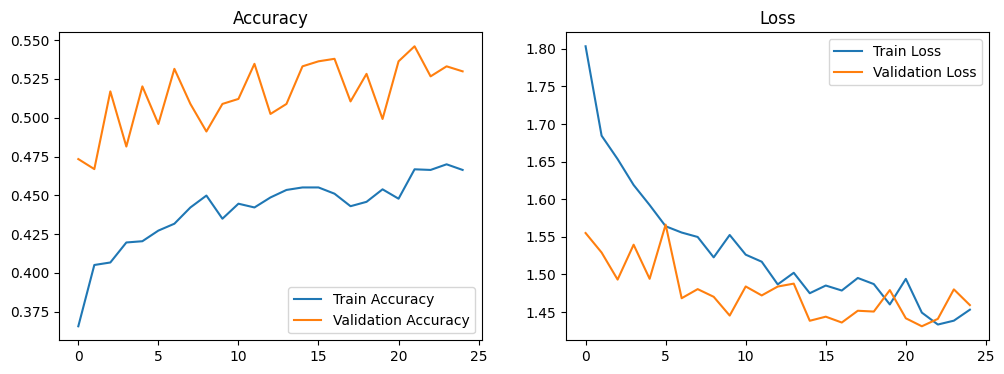

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
img_path = test_folder + "/h_1409"
print("Using image:", img_path)

Using image: /content/banana_split/test/healthy/h_1409


In [ ]:
import os

# Example: pick a class folder
test_folder = "/content/banana_split/test/healthy"
images = os.listdir(test_folder)
print(images)  # This shows all images in that class

# Take the first image
img_name = images[0]
img_path = os.path.join(test_folder, img_name)
print("Full path:", img_path)

# Check if it exists
print(os.path.exists(img_path))

['h_765.jpg', 'h_1119.jpg', 'h_1409.jpg', 'h_1387.jpg', 'h_164.jpg', 'h_215.jpg', 'h_719.jpg', 'h_1104.jpg', 'h_681.jpg', 'h_1346.jpg', 'h_128.jpg', 'h_361.jpg', 'h_1010.jpg', 'h_1083.jpg', 'h_1383.jpg', 'h_352.jpg', 'h_642.jpg', 'h_1389.jpg', 'h_1353.jpg', 'h_244.jpg', 'h_47.jpg', 'h_595.jpg', 'h_743.jpg', 'h_588.jpg', 'h_1305.jpg', 'h_722.jpg', 'h_816.jpg', 'h_1407.jpg', 'h_1255.jpg', 'h_723.jpg', 'h_1546.jpg', 'h_1470.jpg', 'h_1180.jpg', 'h_1141.jpg', 'h_1440.jpg', 'h_858.jpg', 'h_759.jpg', 'h_484.jpg', 'h_708.jpg', 'h_1173.jpg', 'h_898.jpg', 'h_618.jpg', 'h_1251.jpg', 'h_1341.jpg', 'h_3.jpg', 'h_1553.jpg', 'h_428.jpg', 'h_1578.jpg', 'h_1473.jpg', 'h_1493.jpg', 'h_1289.jpg', 'h_1379.jpg', 'h_398.jpg', 'h_16.jpg', 'h_521.jpg', 'h_1174.jpg', 'h_1539.jpg', 'h_476.jpg', 'h_720.jpg', 'h_99.jpg', 'h_1035.jpg', 'h_1047.jpg', 'h_444.jpg', 'h_1214.jpg', 'h_488.jpg', 'h_407.jpg', 'h_186.jpg', 'h_509.jpg', 'h_187.jpg', 'h_556.jpg', 'h_1570.jpg', 'h_135.jpg', 'h_976.jpg', 'h_366.jpg', 'h_855.jp

In [ ]:
!ls /content

 banana_dataset
 banana_dataset_split
 banana_leaf_nutrient_model.h5
 banana_split
 dataset
 dataset_split
'Nutrient Deficient RAW Images of Banana Leaves (1).zip'
'Nutrient Deficient RAW Images of Banana Leaves.zip'
 sample_data


In [ ]:
!ls "/content/banana_split/test"

boron  calcium	healthy  iron  magnesium  manganese  potassium	sulphur  zinc


In [ ]:
!ls "/content/banana_split/test/boron"

b_100.jpg  b_114.jpg  b_142.jpg  b_171.jpg  b_54.jpg  b_69.jpg	b_76.jpg
b_104.jpg  b_117.jpg  b_147.jpg  b_43.jpg   b_55.jpg  b_73.jpg	b_80.jpg
b_105.jpg  b_139.jpg  b_157.jpg  b_48.jpg   b_61.jpg  b_75.jpg


In [ ]:
img_path = "/content/banana_split/test/boron/b_100.jpg"

In [ ]:
import os
print(os.path.exists(img_path))


True


In [ ]:
import os

test_folder = "/content/banana_split/test"
test_images = []

for cls in os.listdir(test_folder):
    cls_folder = os.path.join(test_folder, cls)
    if os.path.isdir(cls_folder):
        for img in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, img)
            test_images.append(img_path)

print("Total test images found:", len(test_images))
print("First 5 images:", test_images[:5])


Total test images found: 621
First 5 images: ['/content/banana_split/test/magnesium/mg_151.jpg', '/content/banana_split/test/magnesium/mg_174.jpg', '/content/banana_split/test/magnesium/mg_211.jpg', '/content/banana_split/test/magnesium/mg_199.jpg', '/content/banana_split/test/magnesium/mg_220.jpg']


In [ ]:
import tensorflow as tf

# Replace with your actual model path
model_path = "/content/banana_leaf_nutrient_model.h5"
model = tf.keras.models.load_model(model_path)
model.summary()  # optional: check model loaded correctly




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,803 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Load model
model = tf.keras.models.load_model("banana_leaf_nutrient_model.h5")

# Load image
img_path = "/content/banana_split/test/boron/b_100.jpg"
img = load_img(img_path, target_size=(128, 128))  # Changed target_size to (128, 128)
img_array = img_to_array(img) / 255.0             # normalize
img_array = np.expand_dims(img_array, axis=0)     # shape = (1,128,128,3)

# Predict
pred = model.predict(img_array, verbose=0)  # verbose=0 suppresses logs

# Class labels
classes = ['boron','calcium','healthy','iron','magnesium','manganese','potassium','sulphur','zinc']
print("Predicted Class:", classes[np.argmax(pred)])

Predicted Class: boron
